# <center>Продажа недвижимости в Москве</center><center>в 2014 году 🏠</center>

### справочник данных

**Сведения об объекте**:
1. `full_sq` - общая площадь в кв. м, включая лоджии, балконы и т.д.;
2. `life_sq` - жилая площадь в кв. м, не включая лоджии, балконы и т.д.;
3. `floor` - номер этажа (для квартир);
4. `max_floor` - число этажей в здании;
5. `material` - материал дома:
    - `panel` - панельный;
    - `brick` - кирпичный;
    - `wood` - деревянный;
    - `mass concrete` - кирпичный;
    - `breezeblock` - блочный;
    - `mass concrete plus brick` - кирпично-монолитный]
6. `build_year` - год постройки дома;
7. `num_room` - количество жилых комнат;
8. `metro_min_avto` - минут до ближайшей станции метро на автомобиле;
9. `metro_km_avto` - км до ближайшей станции метро на автомобиле;
10. `metro_min_walk` - минут до ближайшей станции метро пешком;
11. `metro_km_walk` - км до ближайшей станции метро пешком;
12. `mkad_km` - расстояние до МКАД в км;
13. `kremlin_km` - расстояние до Кремля в км;
14. `green_part_1000` - процент зеленых зон в радиусе 1 км;
15. `prom_part_1000` - процент промышленных зон в радиусе 1 км;
16. `office_count_1000` - число бизнес-центров в радиусе 1 км;
17. `trc_count_1000` - число торговых центров в радиусе 1 км;
18. `leisure_count_1000` - число мест отдыха в радиусе 1 км;
19. `price_doc` - цена продажи объекта;
20. `target` - результирующий признак;

**Сведения о районе**:

21. `sub_area` - название района;
22. `area_m` - площадь района в кв. м;
23. `green_zone_part` - доля зеленых зон в районе; 
24. `indust_part` - доля промышленных зон в районе;
25. `preschool` - число детских садов в районе;
26. `school` - число школ в районе;
27. `healthcare` - число медицинских центров в районе;
28. `radiation` - есть ли в районе захоронения радиоактивных отходов;
29. `detention` - есть ли в районе тюрьмы;
30. `young` - численность населения, не достигшего трудоспособного возраста;
31. `work` - численность трудоспособного населения;
32. `elder` - численность населения пенсионного возраста; 
33. `0_6_age` - численность населения в возрасте до 6 лет;
34. `7_14_age` - численность населения в возрасте от 7 до 14 лет.

### 0. Импорт библиотек

In [128]:
import numpy as np
import pandas as pd

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt

# обработка выбросов
import scipy.stats as stats

# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# метрики
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.metrics import r2_score

# полиномиальная регрессия
from sklearn.preprocessing import PolynomialFeatures

### 1. Загрузка и общий обзор данных

In [149]:
# pd.set_option('display.max_columns', None)


# исходный DataFrame
data = pd.read_csv('housing.csv')

# DataFrame с обработкой категориальных переменных
data_with_categories = data.drop('material', axis=1)
data_with_categories['panel'] = data['material']
data_with_categories['brick'] = data['material']
data_with_categories['wood'] = data['material']
data_with_categories['mass concrete'] = data['material']
data_with_categories['breezeblock'] = data['material']
data_with_categories['mass concrete plus brick'] = data['material']

for i, data in data_with_categories['panel'].items():
    if i 

# DataFrame без обработки категориальных переменных
numeric_data = data.drop(['material', 'sub_area', 'radiation', 'detention'], axis=1)

In [151]:
data_with_categories.head(10)

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,sub_area,area_m,green_zone_part,indust_part,preschool,school,healthcare,shopping,office,radiation,detention,young,work,elder,0_6_age,7_14_age,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc,panel,brick,wood,mass concrete,breezeblock,mass concrete plus brick
0,38,18.0,1.0,14.0,1971.0,1.0,9.0,Dmitrovskoe,7.126815e+06,0.125882,0.458174,4,4,1,5,1,no,no,9604,61600,16509,4533,4439,3.804244,2.563223,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000,panel,panel,panel,panel,panel,panel
1,41,17.0,14.0,16.0,1978.0,1.0,10.0,Savelovskoe,2.641243e+06,0.015900,0.051942,2,2,2,0,7,no,no,8583,35405,14007,4119,4017,1.721190,0.705344,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000,panel,panel,panel,panel,panel,panel
2,41,20.0,11.0,14.0,1989.0,1.0,8.0,Krjukovo,1.084231e+07,0.062172,0.161532,6,6,2,4,1,no,no,12194,58114,14911,5767,5648,29.929680,23.241906,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,4600000,panel,panel,panel,panel,panel,panel
3,38,19.0,6.0,17.0,1986.0,1.0,8.0,Brateevo,7.587523e+06,0.398794,0.000000,6,6,0,5,0,yes,no,12551,69792,20247,6273,5562,3.330545,1.173805,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,5650000,panel,panel,panel,panel,panel,panel
4,58,37.0,3.0,9.0,1968.0,3.0,6.0,Novogireevo,4.395333e+06,0.063755,0.038693,4,4,2,5,1,yes,no,13523,56908,24130,6120,6533,0.584636,0.454650,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,9300000,panel,panel,panel,panel,panel,panel
5,63,46.0,5.0,9.0,1968.0,4.0,5.0,Horoshevo-Mnevniki,1.803644e+07,0.232080,0.111627,4,5,2,3,8,yes,yes,24814,100601,41388,10955,12238,3.067914,2.000012,23.678588,1.973216,6.201052,9.209931,10.77,1.76,2,3,0,11000000,panel,panel,panel,panel,panel,panel
6,32,18.0,5.0,9.0,1968.0,1.0,6.0,Rostokino,3.497819e+06,0.146941,0.210473,1,2,3,0,2,no,no,5074,22837,9591,2334,2398,2.075227,0.610413,7.324954,0.610413,6.270761,9.662435,21.20,30.21,2,2,2,5200000,panel,panel,panel,panel,panel,panel
7,37,19.0,12.0,14.0,1975.0,1.0,9.0,Veshnjaki,1.051837e+07,0.334905,0.012339,6,7,2,4,1,no,no,11729,74032,33184,5208,5776,3.630751,2.402202,28.826423,2.402202,0.723894,13.012073,4.29,0.49,0,2,0,5800000,breezeblock,breezeblock,breezeblock,breezeblock,breezeblock,breezeblock
8,41,17.0,16.0,25.0,2010.0,1.0,10.0,Chertanovo Central'noe,6.879020e+06,0.061477,0.282798,5,5,0,6,2,no,no,16719,68254,27248,7104,8667,3.499965,2.085077,24.894623,2.074552,3.327837,15.268712,45.92,0.00,0,0,0,3000000,panel,panel,panel,panel,panel,panel
9,60,36.0,5.0,7.0,1995.0,2.0,10.0,Poselenie Voskresenskoe,2.149409e+07,0.262459,0.017647,0,0,0,0,0,no,no,1021,4568,1533,489,469,7.185351,5.323021,57.795651,4.816304,8.375744,26.427322,14.75,5.58,0,0,0,3000000,brick,brick,brick,brick,brick,brick


In [71]:
# data.info() показал пропуски. посчитаем пустые значения и оценим размернось

# data.isnull().any()
# data.dtypes
StartDShape = data.shape
print(f'размерность: {data.shape}')
print(f'пустых значений: {data.isnull().sum().sum()}')

# очистка пустых ячеек и перевод в integer
def recode_empty_cells(df, list_of_columns):
    for column in list_of_columns:
      df[column] = df[column].replace(r'\s+', np.nan, regex=True)
      df[column] = df[column].fillna(0)
    return df
# записываем все заголовки в список
columns = []
for column in data:
  columns.append(column)
# удаляем строки без данных во всех столбцах
recode_empty_cells(data, columns)
# переводим все столбцы из float в integer (для упрощения работы с годами, этажностью и тд)
to_convert = []
for column in data:
  if data[column].dtype == 'float64': to_convert.append(column)
data[to_convert] = data[to_convert].astype(int)

размерность: (8894, 36)
пустых значений: 57


In [72]:
# сводная статистика по количественным признакам
data.describe()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,area_m,green_zone_part,indust_part,preschool,school,healthcare,shopping,office,young,work,elder,0_6_age,7_14_age,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
count,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8.894000e+03,8894.0,8894.0,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8.894000e+03
mean,51.724196,30.417248,6.733303,12.186755,1966.371037,1.952665,7.716101,1.108296e+07,0.0,0.0,5.095120,5.946256,1.743423,4.862941,7.382617,14133.977625,69035.969080,24949.562064,6506.230155,6760.512368,3.378570,2.279065,30.935462,2.117607,5.023162,13.130313,14.315943,8.645604,2.933101,2.072296,0.360243,7.807093e+06
std,20.039067,13.506626,4.800781,5.639183,168.737970,0.862990,2.818154,1.051812e+07,0.0,0.0,2.649712,3.015129,1.511100,4.105298,16.671204,7499.271182,31818.820787,10869.045111,3469.111148,3607.526395,5.496146,4.738517,54.951223,4.583213,4.447214,7.057235,12.579249,11.907931,7.307584,2.235402,1.239451,5.024875e+06
min,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.081627e+06,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,365.000000,1633.000000,548.000000,175.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,19.000000,3.000000,9.000000,1966.000000,1.000000,6.000000,5.686537e+06,0.0,0.0,4.000000,4.000000,1.000000,2.000000,1.000000,9647.000000,49242.000000,17508.000000,4533.000000,4625.000000,1.000000,0.000000,9.000000,0.000000,2.000000,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.450861e+06
50%,45.000000,29.000000,5.000000,12.000000,1976.000000,2.000000,8.000000,8.464344e+06,0.0,0.0,5.000000,6.000000,1.000000,4.000000,3.000000,12842.000000,65499.000000,25045.000000,5797.000000,5992.000000,2.000000,1.000000,16.000000,1.000000,4.000000,12.000000,10.000000,4.000000,1.000000,2.000000,0.000000,6.950000e+06
75%,60.000000,38.000000,9.000000,16.000000,1995.000000,3.000000,9.000000,1.249544e+07,0.0,0.0,6.000000,7.000000,3.000000,6.000000,6.000000,16719.000000,91795.000000,31147.000000,7753.000000,7976.000000,3.000000,2.000000,25.000000,2.000000,7.000000,15.000000,21.000000,13.000000,3.000000,3.000000,0.000000,9.200000e+06
max,275.000000,232.000000,77.000000,57.000000,4965.000000,17.000000,57.000000,2.060718e+08,0.0,0.0,13.000000,14.000000,6.000000,23.000000,141.000000,40692.000000,161290.000000,57086.000000,19223.000000,19083.000000,60.000000,74.000000,711.000000,59.000000,53.000000,70.000000,100.000000,72.000000,84.000000,20.000000,30.000000,8.077744e+07


**Вывод**: 
- Ср. общая площадь квартир в выборке - 51.7 кв.м
- Ср. жилая площадь квартир в выборке - 30.4 кв.м
- Ср. расстояние от квартиры до метро 2.1 км (31 мин. пешком)
- Ср. расстояние до МКАДа ~ 5 км
- Ср. расстояние до Кремля ~ 13 км
- Ср. цена квартир - 7.8 млн. руб

In [73]:
# сводная статистика по категориальным признакам
data.describe(include='O')

,material,sub_area,radiation,detention
count,8894,8894,8894,8894
unique,4,100,2,2
top,panel,0,no,no
freq,5563,2261,4579,7910


**Вывод**: 
- материал дома имеет 4 уикальных значения
- уникальных районов - 100
- наиболее популярный материал - панель (5535/8848)
- в большинстве районов нет радиоактивных захоронений и тюрем

# <center>Разведочный анализ данных 🕵️‍♂️</center><center> (Exploratory Data Analysis) </center>

### 2. Одномерный анализ

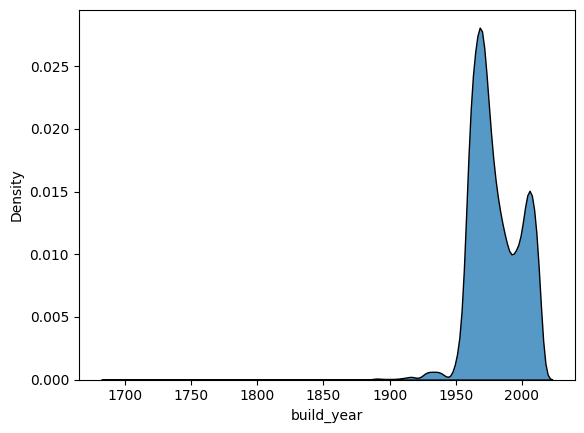

[1691 1860 1876 1890 1895 1896 1900 1904 1906 1907 1910 1912 1914 1915
 1917 1920 1924 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1943 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014] 

 медиана:  1976.0 
 квантиль:  2000.0 
 усеченное среднее:  1979.421 
 дисперсия:  336.336 
 среднее абсолютное отклонение:  15.062 
 коэффициент асимметрии:  -0.457 
 коэффициент эксцесса:  7.166 

count    8831.00
mean     1979.83
std        18.34
min      1691.00
25%      1967.00
50%      1976.00
75%      1995.00
max      2014.00
Name: build_year, dtype: float64


In [74]:
# год постройки дома [`build_year`]

from scipy.stats import trim_mean
# data['build_year'].value_counts() # таблица частот
# удаляем очевидные выбросы в годах
data = data.loc[data['build_year'] < 2022]
data = data.loc[data['build_year'] > 1600]
# строим график
sns.kdeplot(data = data, x = 'build_year', multiple="stack")
plt.show()
# выводим метрики
print(
    data['build_year'].sort_values().unique(), '\n\n',
    'медиана: ', data['build_year'].median(), '\n',
    'квантиль: ', data['build_year'].quantile(0.8), '\n',
    'усеченное среднее: ', round(trim_mean(data['build_year'], 0.1), 3), '\n',
    'дисперсия: ', round(data['build_year'].var(), 3), '\n',
    # 'среднее абсолютное отклонение: ', round(data['build_year'].mad(), 3), '\n',
    'среднее абсолютное отклонение: ', round((data['build_year'] - data['build_year'].mean()).abs().mean(), 3), '\n',
    'коэффициент асимметрии: ', round(data['build_year'].skew(), 3), '\n',
    'коэффициент эксцесса: ', round(data['build_year'].kurtosis(), 3), '\n'
    )
print(round(data['build_year'].describe(), 2))

**Вывод**: 
- Большинство людей живёт в домах 1960-2000гг постройки

nминимальная площадь квартиры - 12
максимальная площадь квартиры - 275


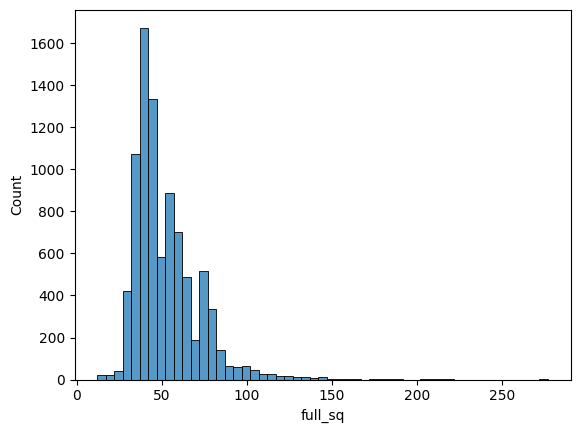

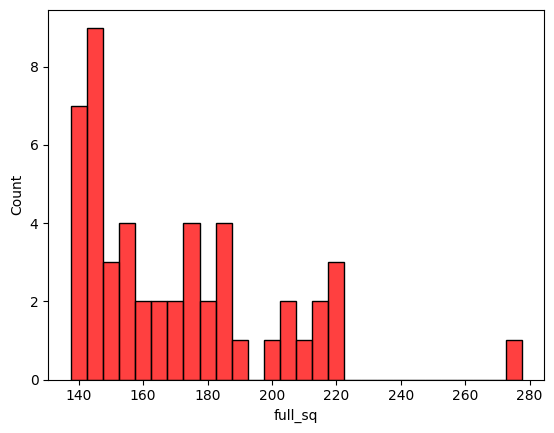

In [75]:
# общая площадь ['full_sq']


# выясним в каких границах находится площадь квартир и построим гистограмму
x = data['full_sq'].min()
y = data['full_sq'].max()
print(f'минимальная площадь квартиры - {x}\nмаксимальная площадь квартиры - {y}')

sns.histplot(data = data, x = 'full_sq',
            binwidth = 5,
            binrange = [x, y])
plt.show()

# построим отдельную гистограмму для больших площадей
sns.histplot(data = data, x = 'full_sq',
            color = 'red',
            binwidth = 5,
            binrange = [y/2, y])
plt.show()

**Вывод**: 
- Большинство часть квартир имеют площадь 40 кв.м

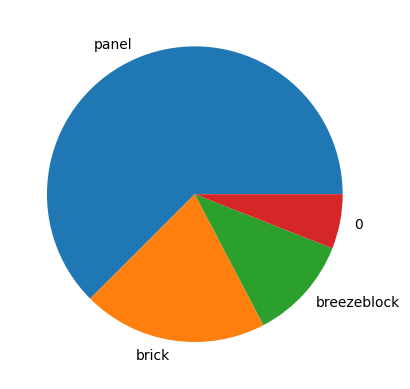

In [77]:
vc = data['material'].value_counts()
plt.pie(vc, labels = vc.index)
plt.show()

**Вывод**: 
- Большая часть домов - панельные и кирпичные

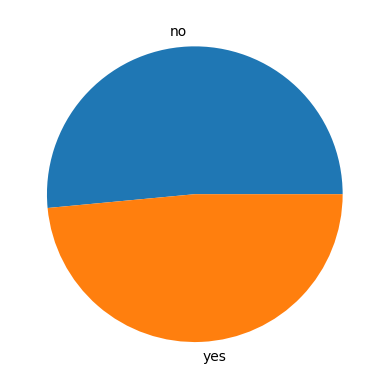

In [78]:
vc1 = data['radiation'].value_counts()
plt.pie(vc1, labels = vc1.index)
plt.show()

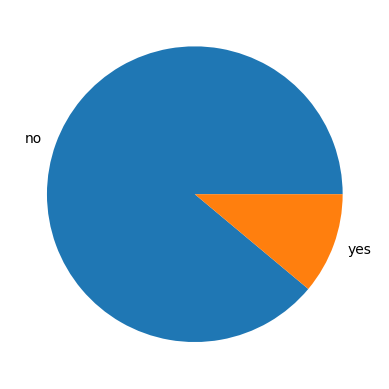

In [79]:
vc = data['detention'].value_counts()
plt.pie(vc, labels = vc.index)
plt.show()

**Вывод**: 
- Подозрительно много радиоактивных отходов. Тюрем почт нет

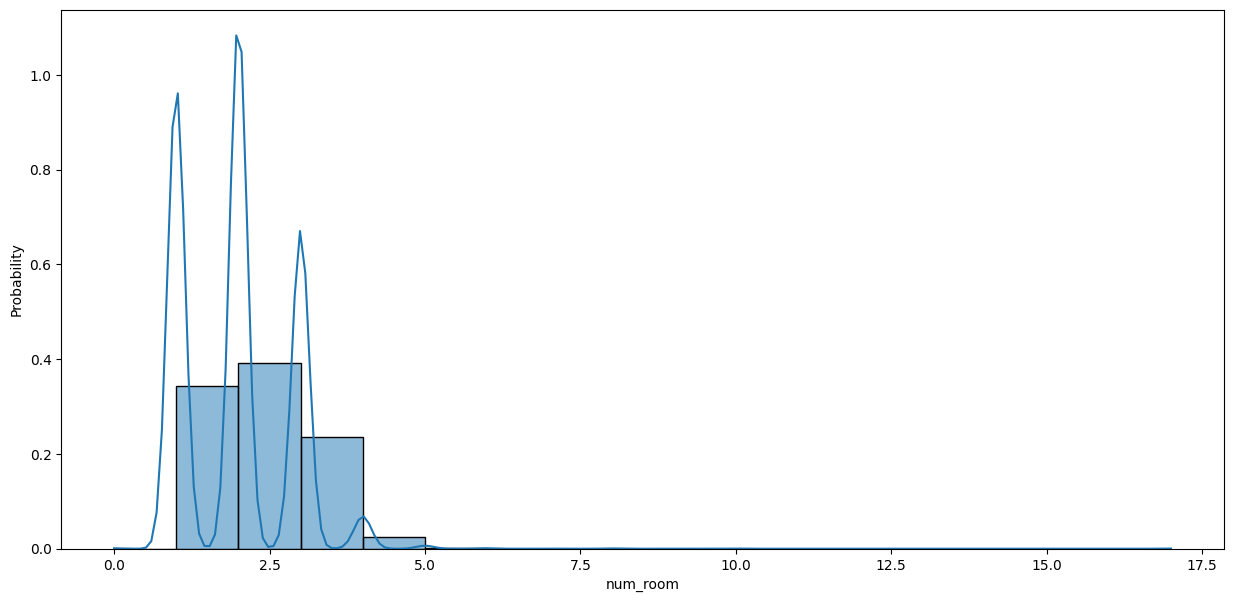

In [80]:
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'num_room',
            binwidth = 1,
            stat = 'probability',
            common_norm = False,
            kde = True)
plt.show()

**Вывод**: 
- Обычно в квартире 1-3 комнаты

### 3. Многомерный анализ

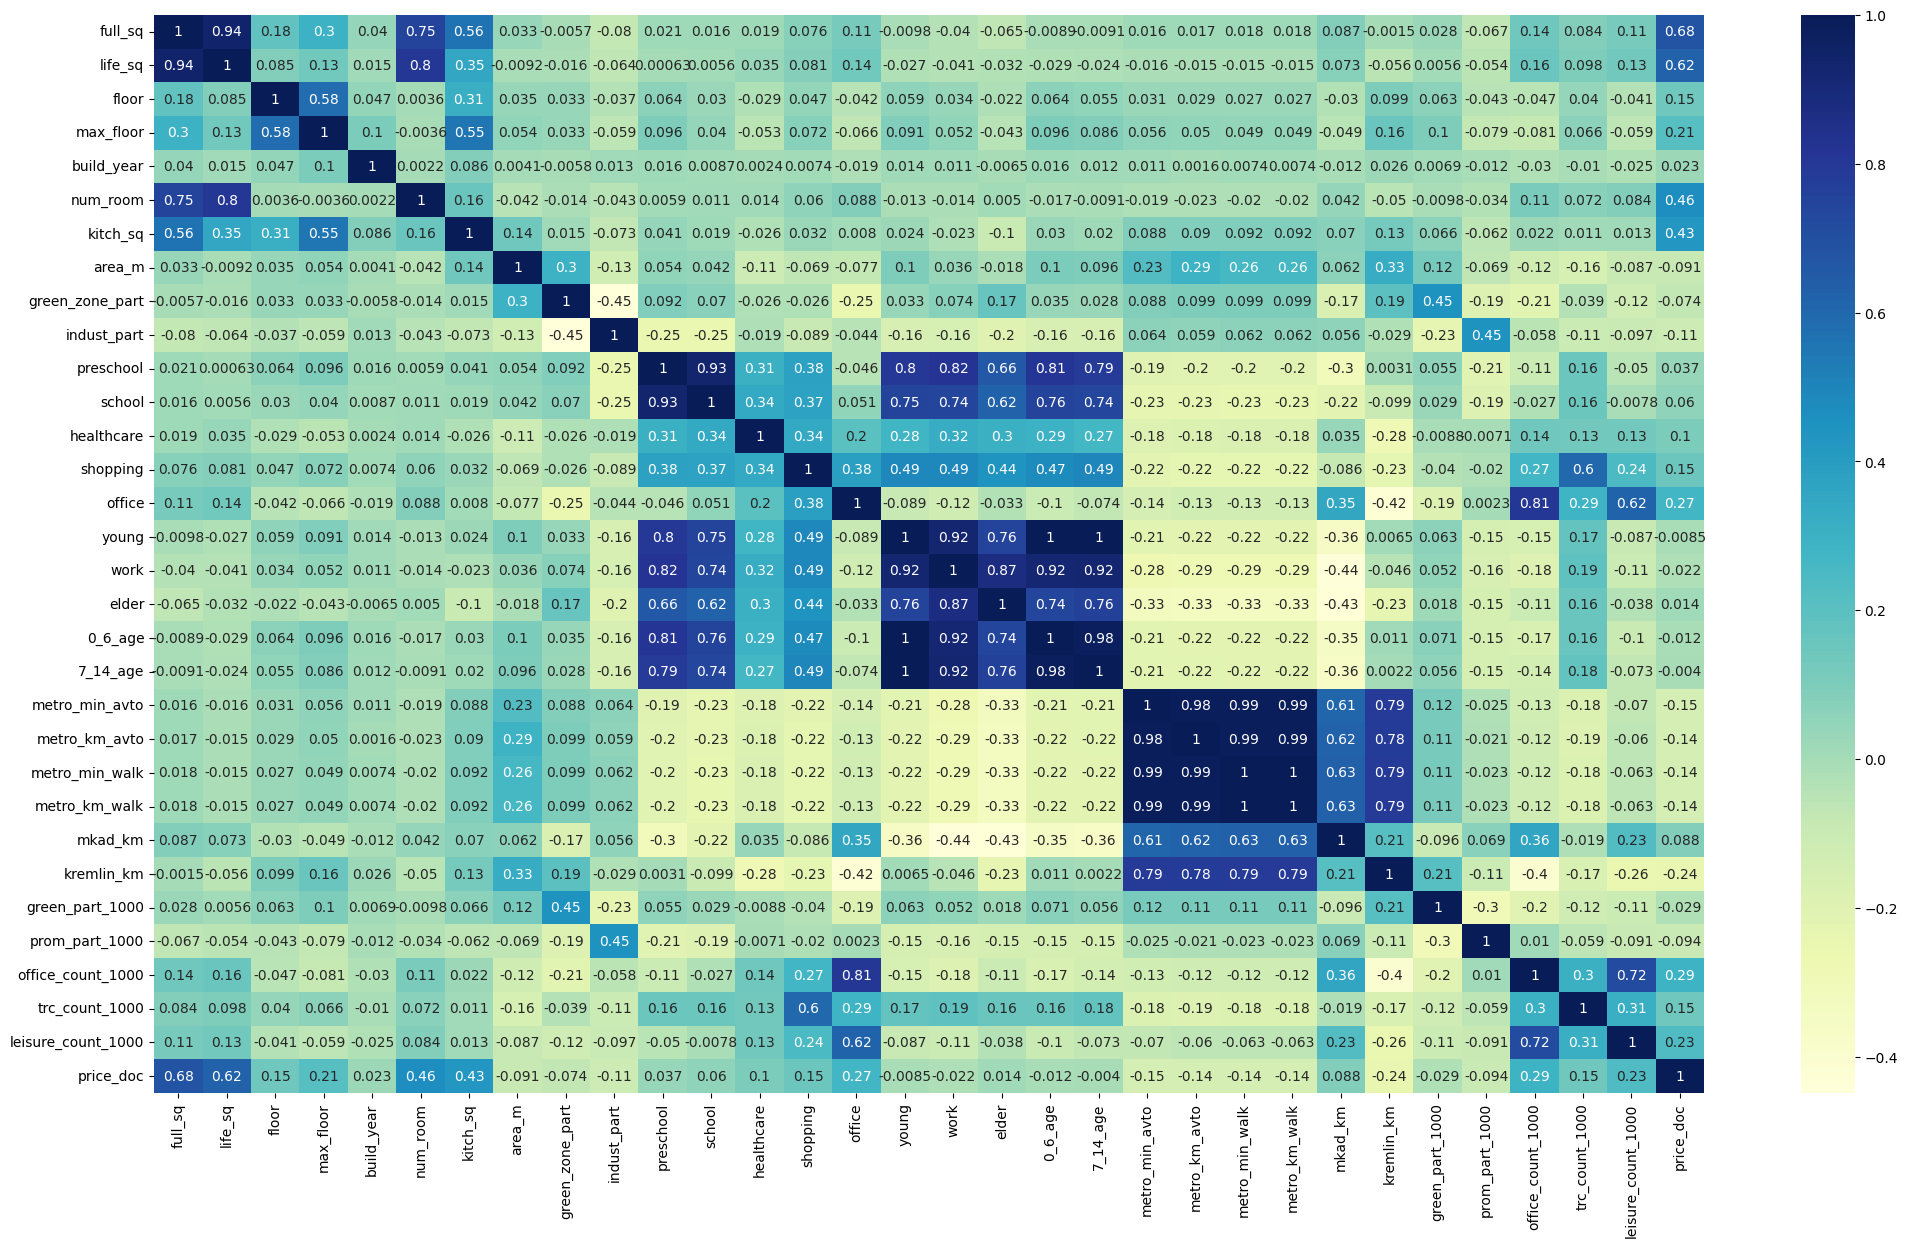

In [81]:
# корреляция признаков между собой
# data.corr()

plt.figure(figsize = (25, 14))
sns.heatmap(numeric_data.corr(method = 'pearson'), annot = True, cmap = "YlGnBu")
plt.show()

**Вывод**: 
1. достаточно сильной связи у результата нет ни с одним фактором
2. наиболее сильная связь с результатом у признаков:
    - [full_sq; life_sq] (прощадь квартиры)
3. наиболее слабая связь с результатом у признаков:
    - [young; work; elder; 0_6_age; 7_14_age] (распределние жителей района по соц. группам)
    - [metro_min_avto; metro_km_avto; metro_min_walk; metro_km_walk; mkad_km; kremlin_km] (расстояние до метро, кремля и МКАДа)
    - эти же показатели имеют сильную связь друг с другом (мультиколлинеарность)
4. 14/33 признаков имеют не прямую, а обратную связь с результирующим показателем (наиболее сильная - расстояние до Кремля с ценой продажи)

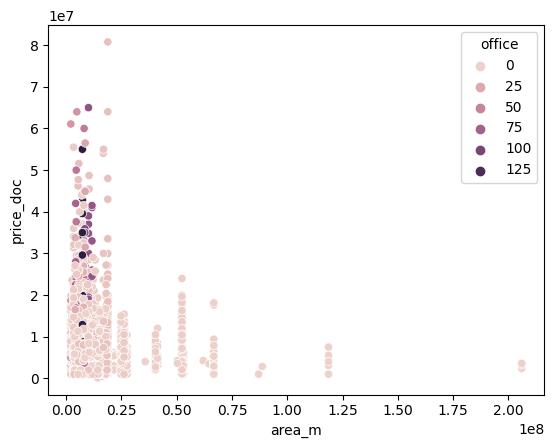

In [82]:
# число офисов имеет наиболее сильную связь с ценой квартиры
# (по сравнению с больницами, школами и детскими садами)

sns.scatterplot(data = data, x = 'area_m', y = 'price_doc', hue = 'office')
plt.show()

**Вывод**: 
1. офисы есть в относительно небольших районах, в больших - их совсем нет
2. в больших районах цены продажи квартир ниже, чем в маленьких

In [83]:
pd.crosstab(data['material'], data['num_room'], normalize = 'all', margins = True)

num_room,0,1,2,3,4,5,6,7,8,10,17,All
material,,,,,,,,,,,,
0,0.000113,0.021062,0.018684,0.016306,0.003284,0.000226,0.000000,0.000000,0.000000,0.000000,0.000000,0.059676
breezeblock,0.000113,0.045748,0.052316,0.014834,0.000340,0.000113,0.000000,0.000000,0.000000,0.000000,0.000000,0.113464
brick,0.000113,0.059676,0.087080,0.046654,0.007247,0.000679,0.000226,0.000113,0.000226,0.000000,0.000000,0.202016
panel,0.000000,0.216736,0.234854,0.158419,0.013249,0.001246,0.000113,0.000000,0.000000,0.000113,0.000113,0.624844
All,0.000340,0.343223,0.392934,0.236213,0.024120,0.002265,0.000340,0.000113,0.000226,0.000113,0.000113,1.000000


**Вывод**: 
1. однокомнатные квартиры превалируют в:
    - блочных домах [breezeblock]
    - кирпичных домах [brick]
    - панельных  домах [panel]
2. больше всего квартир с 2 комнатами в кирпичных домах
3. квартиру с более чем 5 комнатами можно купить только в кирпичном доме
4. в выборке больше всего квартир с 1-2 комнатами. более 60% всех квартир в панельных домах

### 4. Обработка выбросов и пропусков

In [86]:
# в столбцах build_year, metro_min_walk и metro_km_walk есть пропуски данных
# data.isnull().any()

a = data['build_year'].isnull().sum() # количество пропусков в столбце build_year
b = data['metro_min_walk'].isnull().sum() # количество пропусков в столбце metro_min_walk
c = data['metro_km_walk'].isnull().sum() # количество пропусков в столбце metro_km_walk
print(f'пропусков в build_year: {a}\nпропусков в metro_min_walk: {b}\nпропусков в metro_km_walk: {c}')

пропусков в build_year: 35
пропусков в metro_min_walk: 11
пропусков в metro_km_walk: 11


<AxesSubplot: >

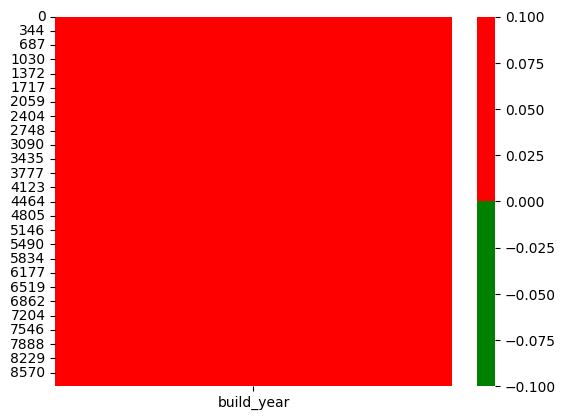

In [131]:
# визуализация пропусков данных в параметре build_year (наибольшее кол-во пропусков)
cols = data.columns[5:6]
colours = ['green', 'red']
sns.heatmap(data[cols].isnull(), cmap = sns.color_palette(colours))

In [93]:
# удалим строки, в которых содержатся пропуски
data.dropna(subset = ['metro_min_walk', 'metro_km_walk', 'build_year'], inplace = True)
print(f'было: {StartDShape}')
print(f'стало: {data.shape}')

# удалим строки, в которых содержатся пропуски
numeric_data.dropna(subset = ['metro_min_walk', 'metro_km_walk', 'build_year'], inplace = True)

было: (8894, 36)
стало: (8848, 36)


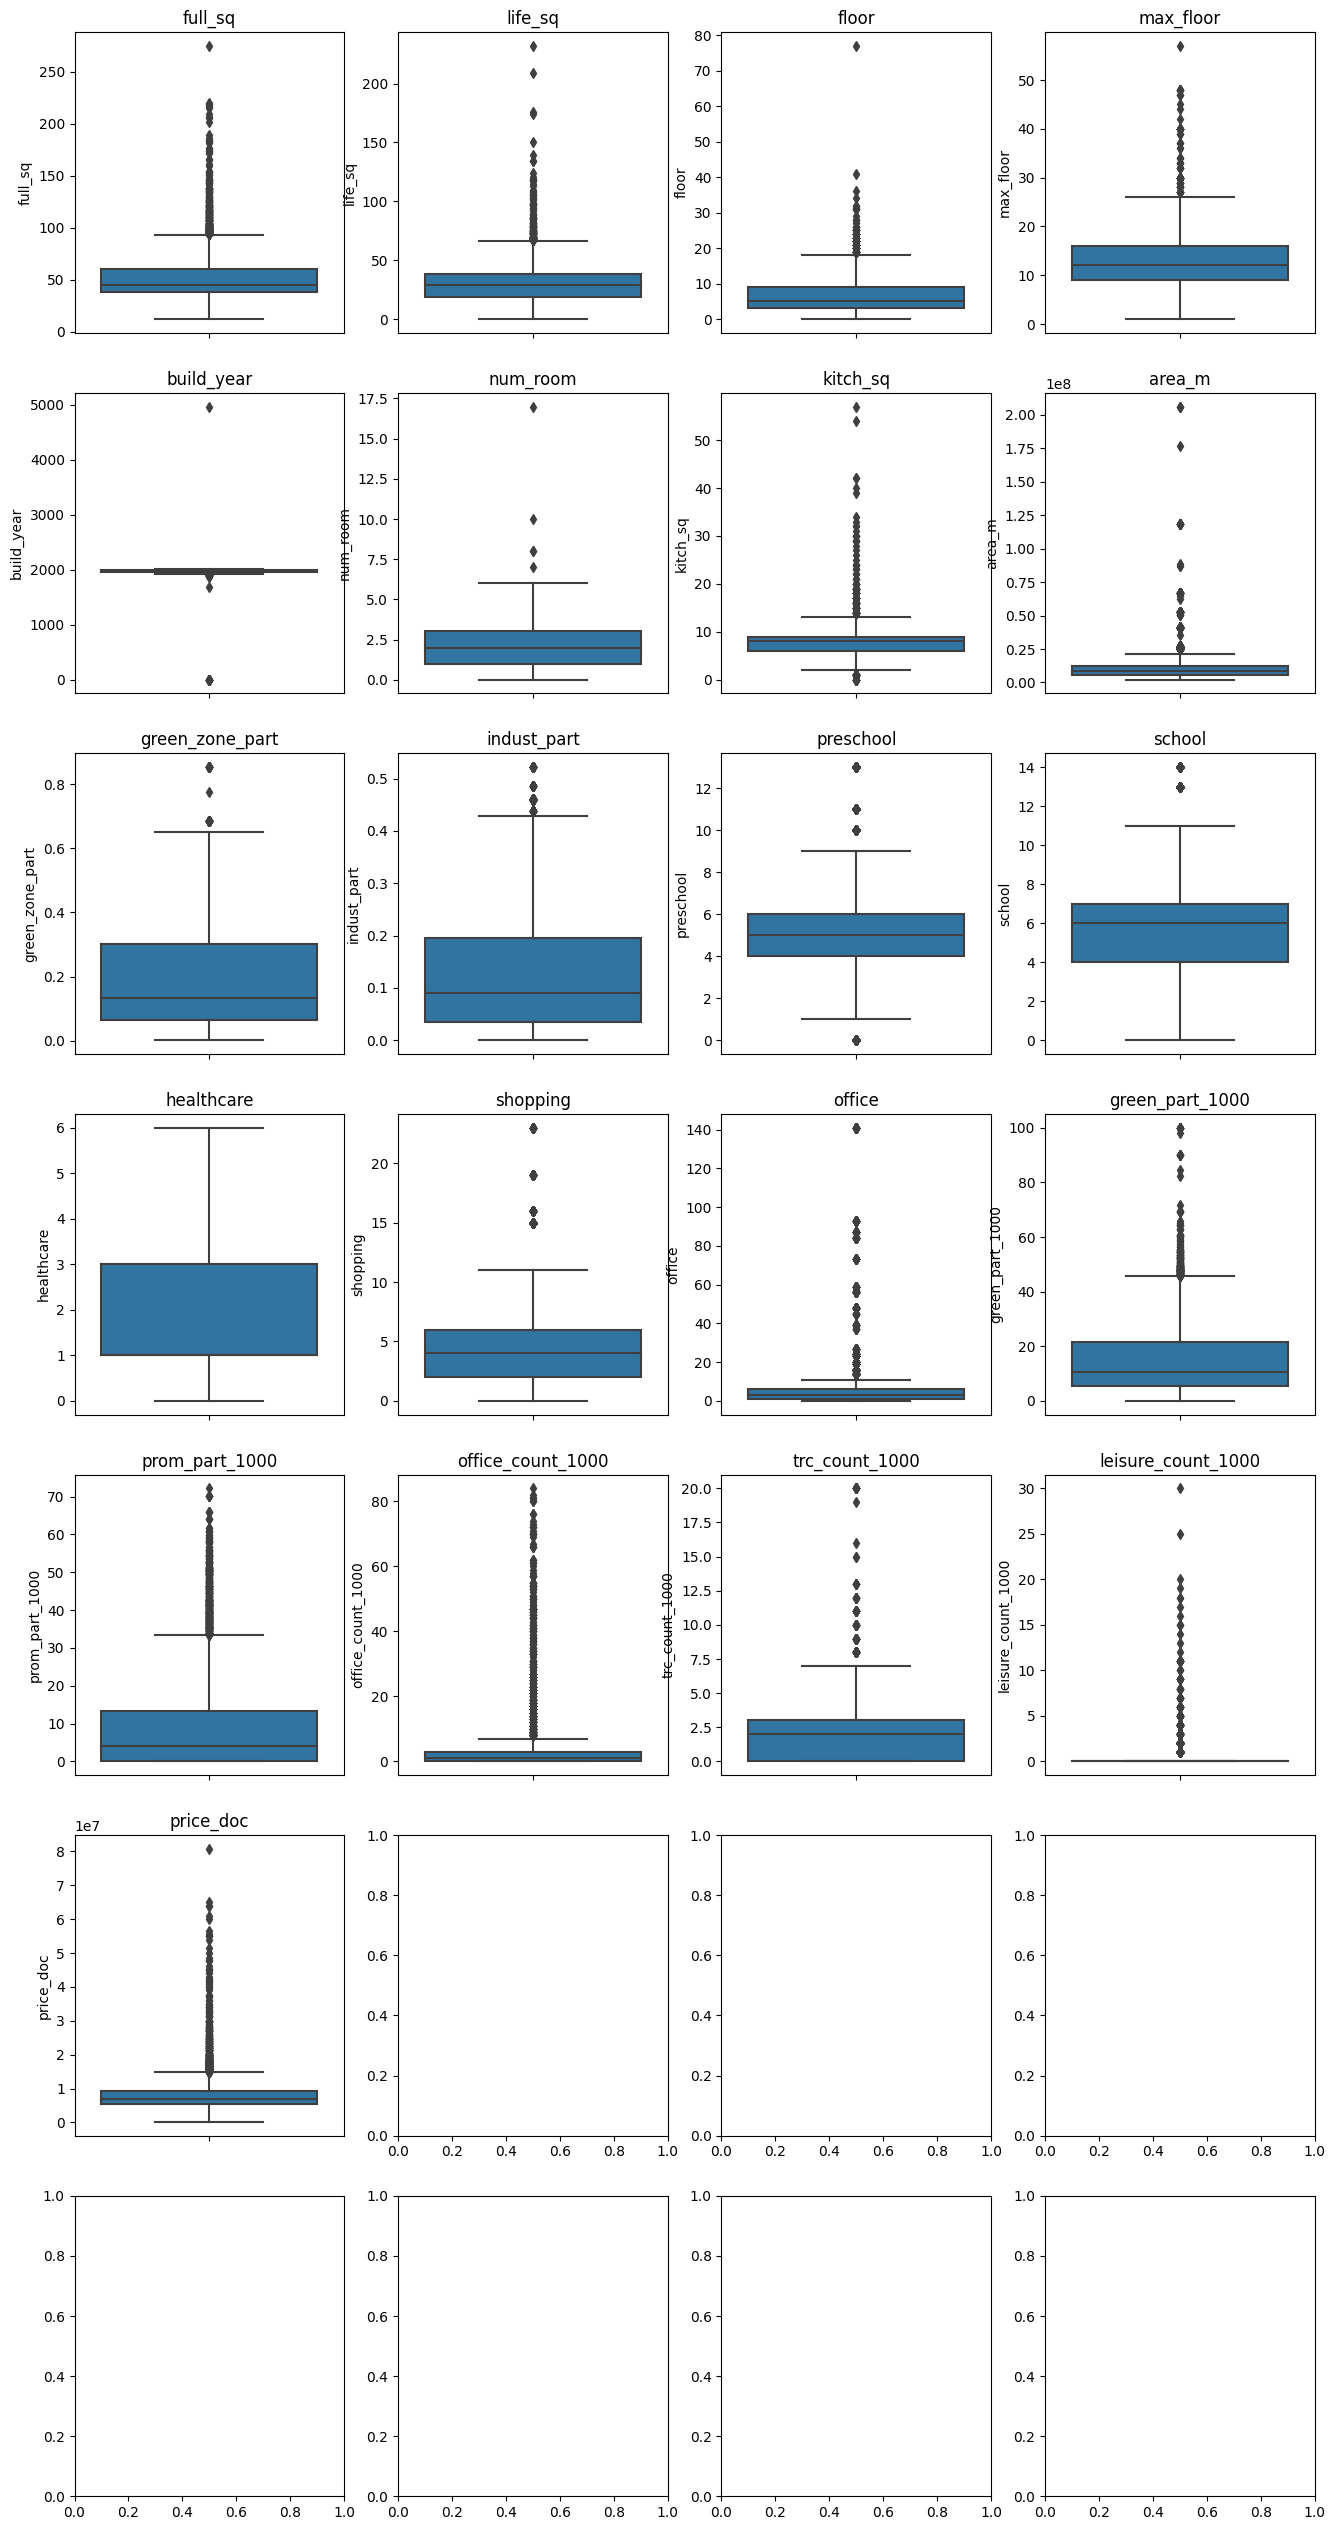

In [133]:
# Построим ящик с усами для каждого признака

fig, axes = plt.subplots(nrows = 7, ncols = 4, figsize = (16, 32))

for idx, feature in enumerate(numeric_data.columns):
    sns.boxplot(y = numeric_data[feature], ax = axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].set_title(feature)

**Вывод**: 
1. выбросов много почти у каждого признака
2. варианты решения проблемы:
    - просчитать по каждому признаку квартили и удалить то, что за их пределами
    - удалить очевидные ошибки вручную


### 5. Обработка признаков в зависимости от их типа 

1. для построения регрессии не получится использовать категориальные признаки. так как их всего четыре, был создан отдельный DataFrame numeric_data
2. удалим из DataFrame с количественными признаками признаки с:
    - наименьшей корреляцией с результатом
    - сильной мультиколлинеарностью

In [94]:
numeric_data.drop(columns = ['young', 'work', 'elder', '0_6_age', '7_14_age',
                             'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk',
                             'mkad_km', 'kremlin_km'], axis = 1, inplace = True)

print(f'было: {StartDShape}')
print(f'стало: {numeric_data.shape}')

было: (8894, 36)
стало: (8848, 21)


# <center>Linear Regression 📈</center>

### 6.1 линейная регрессия 

In [96]:
# подготовка данных (размер тестовой выборки - 30%)
X_train, X_test, y_train, y_test = train_test_split(numeric_data.drop('price_doc', axis = 1), numeric_data['price_doc'],
                                                    test_size = 0.2, random_state = 22)

lin_reg = LinearRegression() # задание линейной регрессии
lin_reg.fit(X_train, y_train) # обучение модели

y_approx_1 = lin_reg.predict(X_train)
y_pred_1 = lin_reg.predict(X_test)

lin_reg.coef_

array([ 1.95155368e+05, -3.89260287e+04,  3.31722004e+04, -4.77219303e+04,
       -1.84592941e+02, -4.75568533e+05,  1.56214471e+05, -4.98977009e-02,
       -7.40597770e+05, -2.08394795e+06, -8.26464076e+04,  9.66188653e+04,
        1.42275357e+05,  3.37868346e+02,  2.88895881e+04, -3.57893324e+03,
       -1.26685315e+04,  5.64585738e+04,  1.47698932e+04,  7.47085127e+04])

- Вывод:

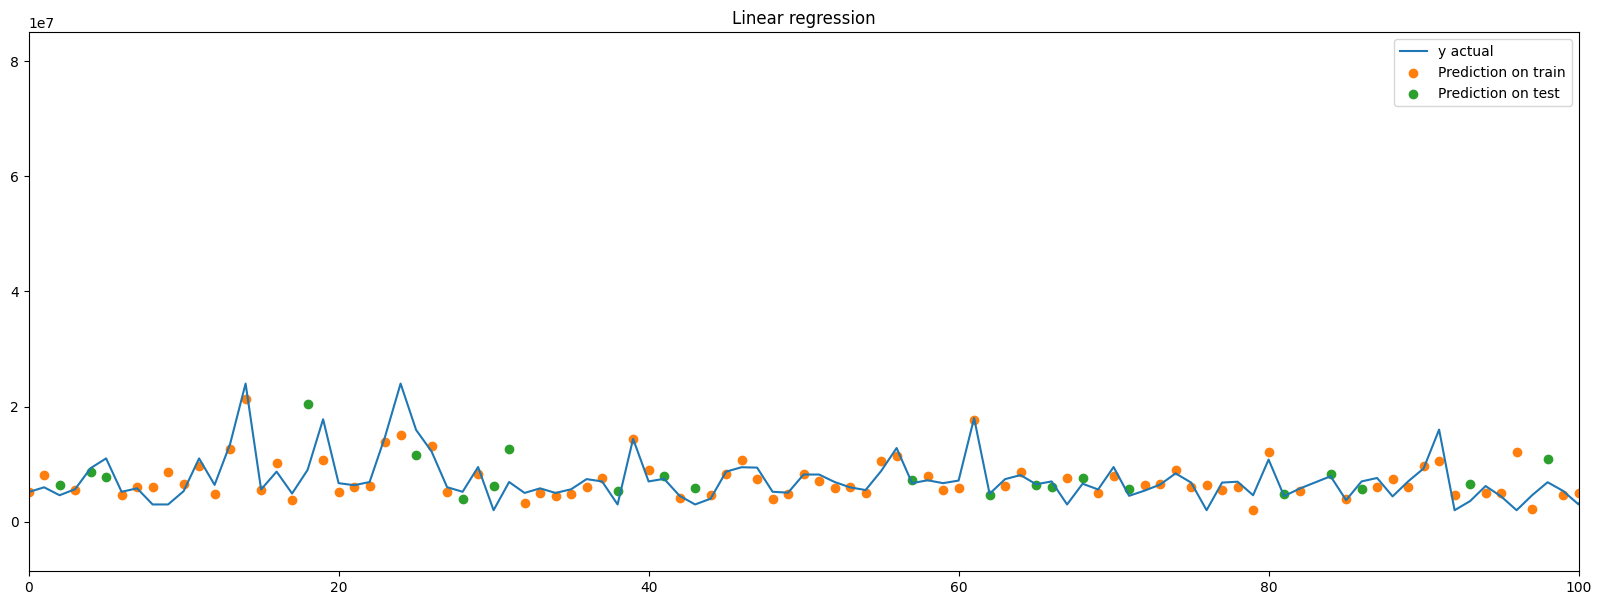

In [97]:
plt.figure(figsize = [20, 7])

y = numeric_data['price_doc']

plt.plot(y, label = 'y actual')
plt.scatter(x = y_train.index, y = y_approx_1, color = 'C1', label = 'Prediction on train')
plt.scatter(x = y_test.index, y = y_pred_1, color = 'C2', label = 'Prediction on test')
plt.title('Linear regression')
plt.legend()
plt.xlim([0, 100])
plt.show()

### 6.2 метрики

In [118]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_1)
print('MAPE (средняя абсолютная процентная ошибка) on train: {:.2%}'.format(mape_approx_1))
r2_approx_1 = r2_score(y_train, y_approx_1)
print('R^2 (коэффициент детерминации) on train: {:.2}'.format(r2_approx_1))
mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_1)
print('MAPE on test: {:.2%}'.format(mape_test_1))

MAPE (средняя абсолютная процентная ошибка) on train: 63.76%
R^2 (коэффициент детерминации) on train: 0.54
MAPE on test: 58.59%


**Вывод**:
1. в этой модели оптимально использовтать критерий MAPE (средняя абсолютная ошибка в процентах)
2. качество аппроксимации среднее, исследуемые признаки на 56% объясняют изменение продажной цены
3. ошибка на тесте (56.34%) меньше, чем при обучении (61.88%)

In [10]:
# статистика

# import statsmodels.api as sm

# X = sm.add_constant(np.array(X_train))
# est = sm.OLS(y_train, X)
# est2 = est.fit()
# print(est2.summary())

# <center>Повторная регрессия ♻</center>

### 7.1 лассо

In [99]:
# sns.heatmap(data[['full_sq', 'build_year', 'metro_min_walk', 'mkad_km', 'leisure_count_1000']].corr(method = 'pearson'), annot = True, cmap = "YlGnBu")
# plt.show()

In [101]:
lasso = Lasso(alpha = 0.1) # построение модели Лассо с заданным параметром
lasso.fit(X_train, y_train) # обучение модели Лассо

y_approx_2 = lasso.predict(X_train)
y_pred_2 = lasso.predict(X_test)

# метрики
mape_approx_2 = mean_absolute_percentage_error(y_train, y_approx_2)
print('MAPE on train (approx): {:.2%}'.format(mape_approx_2))
mape_test_2 = mean_absolute_percentage_error(y_test, y_pred_2)
print('MAPE on train (test): {:.2%}'.format(mape_test_2))

dict(zip(numeric_data.columns.values, lasso.coef_)) # коэффициенты регрессии Лассо

MAPE on train (approx): 63.76%
MAPE on train (test): 58.59%


{'full_sq': 195155.3578238052,
 'life_sq': -38926.0305733199,
 'floor': 33172.18699113455,
 'max_floor': -47721.90779020289,
 'build_year': -184.59310360546496,
 'num_room': -475568.1782153179,
 'kitch_sq': 156214.5028485219,
 'area_m': -0.04989772596852182,
 'green_zone_part': -740587.3756328804,
 'indust_part': -2083933.4030911229,
 'preschool': -82646.11796299045,
 'school': 96618.72890788852,
 'healthcare': 142275.2506628429,
 'shopping': 337.827142300096,
 'office': 28889.6199037451,
 'green_part_1000': -3578.964404159737,
 'prom_part_1000': -12668.575699142377,
 'office_count_1000': 56458.59616563329,
 'trc_count_1000': 14769.892570073756,
 'leisure_count_1000': 74708.37639330752}

**Вывод**:
1. значение МАРЕ при обучении лучше, чем на тесте
2. оптимально использовтать критерий MAPE (значение близко с МАРЕ в линейной регрессии)
3. обнуляется только коэффициент при area_m (площадь района)

### 7.2 гребневая регрессия

In [103]:
ridge = Ridge(alpha = 0.1) # построение гребневой регрессии при заданном параметре
ridge.fit(X_train, y_train) # обучение модели

y_approx_3 = ridge.predict(X_train)
y_pred_3 = ridge.predict(X_test)

mape_approx_3 = mean_absolute_percentage_error(y_train, y_approx_3)
print('MAPE on train: {:.2%}'.format(mape_approx_3))
mape_test_3 = mean_absolute_percentage_error(y_test, y_pred_3)
print('MAPE on test: {:.2%}'.format(mape_test_3))

dict(zip(numeric_data.columns.values, ridge.coef_)) # коэффициенты гребневой регрессии

MAPE on train: 63.76%
MAPE on test: 58.59%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.25951e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'full_sq': 195155.75619593155,
 'life_sq': -38927.40936385496,
 'floor': 33171.63298228538,
 'max_floor': -47720.355031193954,
 'build_year': -184.63868624897339,
 'num_room': -475543.0548226817,
 'kitch_sq': 156220.1540734922,
 'area_m': -0.04990063807985942,
 'green_zone_part': -738839.3043685731,
 'indust_part': -2080322.9622027026,
 'preschool': -82634.3618420484,
 'school': 96635.0179669853,
 'healthcare': 142258.5389021853,
 'shopping': 331.24310329075576,
 'office': 28893.683267525754,
 'green_part_1000': -3582.9446787936477,
 'prom_part_1000': -12680.55213490448,
 'office_count_1000': 56462.09266829149,
 'trc_count_1000': 14777.26015956605,
 'leisure_count_1000': 74707.85479860374}

**Вывод**:
1. значение МАРЕ при обучении лучше, чем на тесте
2. оптимально использовтать критерий MAPE (значение совпадает с МАРЕ в линейной регрессии)
3. обнуляется только коэффициент при area_m (площадь района)

### 7.3 кросс-валидация

In [104]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 20) # создадим 10 блоков

grid = {'alpha': np.linspace(0, 2, 20)} # зададим параметр

gs1 = GridSearchCV(Ridge(normalize = True), grid, 
                  n_jobs = -1, 
                  scoring = "neg_mean_absolute_percentage_error", # мера качества
                  cv = cv,
                  verbose = 1)
gs2 = GridSearchCV(Ridge(normalize = True), grid, 
                  n_jobs = -1, 
                  scoring = "neg_mean_absolute_error", # мера качества
                  cv = cv,
                  verbose = 1)
gs3 = GridSearchCV(Ridge(normalize = True), grid, 
                  n_jobs = -1, 
                  scoring = "neg_mean_squared_error", # мера качества
                  cv = cv,
                  verbose = 1)

In [129]:
# %%time
# gs1.fit(X_train, y_train)
# gs2.fit(X_train, y_train)
# gs3.fit(X_train, y_train)

In [106]:
# средняя абсолютная процентная ошибка

gs1.best_params_ # параметр по лучшей модели (критерий - МАРЕ)

{'alpha': 0.8421052631578947}

In [107]:
# средняя абсолютная ошибка

gs2.best_params_ # параметр по лучшей модели (критерий - МАЕ)

{'alpha': 0.7368421052631579}

In [108]:
# средняя квадратическая ошибка

gs3.best_params_ # параметр по лучшей модели (критерий - МSЕ)

{'alpha': 0.0}

In [109]:
gs1.best_score_ , gs2.best_score_ , gs3.best_score_ # по лучшей модели для разных критериев

(-0.6326763427400429, -2159229.654646977, -12640058847053.414)

In [110]:
gs1.best_estimator_.coef_ # лучшие коэффициенты по критерию МАРЕ (обнуляется только коэффициент при area_m)

array([ 4.96489409e+04,  5.93812926e+04,  2.59188080e+04,  2.72908623e+04,
        3.51616722e+01,  4.42748551e+05,  2.35874361e+05, -2.24728128e-02,
       -6.80917459e+05, -1.34893590e+06, -3.45627667e+02,  2.07893185e+04,
        1.05102981e+05,  1.60679674e+04,  1.98382224e+04, -2.24659852e+03,
       -9.91421611e+03,  4.77524110e+04,  2.97168662e+04,  1.63558244e+05])

In [111]:
gs2.best_estimator_.coef_ # лучшие коэффициенты по критерию МАЕ (обнуляется только коэффициент при area_m)

array([ 5.18331453e+04,  6.10879489e+04,  2.60976242e+04,  2.60401026e+04,
        2.26810574e+01,  4.30501074e+05,  2.44728730e+05, -2.39871536e-02,
       -7.00866714e+05, -1.40735211e+06, -1.36630688e+03,  2.18915023e+04,
        1.09213239e+05,  1.50543581e+04,  2.04488420e+04, -2.31902454e+03,
       -1.01667518e+04,  4.90668795e+04,  2.82261677e+04,  1.62781697e+05])

In [112]:
gs3.best_estimator_.coef_ # лучшие коэффициенты по критерию МSЕ (обнуляется только коэффициент при area_m)

array([ 1.95155368e+05, -3.89260287e+04,  3.31722004e+04, -4.77219303e+04,
       -1.84592941e+02, -4.75568533e+05,  1.56214471e+05, -4.98977008e-02,
       -7.40597770e+05, -2.08394795e+06, -8.26464076e+04,  9.66188653e+04,
        1.42275357e+05,  3.37868346e+02,  2.88895881e+04, -3.57893324e+03,
       -1.26685315e+04,  5.64585738e+04,  1.47698932e+04,  7.47085127e+04])

# <center>Polynomial Features 📈</center>

### 8. полиномиальная регрессия

In [114]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
poly_reg1 = LinearRegression()
poly_reg1.fit(X_poly_train, y_train)

LinearRegression()

In [115]:
y_approx_4 = poly_reg1.predict(X_poly_train)
y_pred_4 = poly_reg1.predict(X_poly_test)

In [119]:
mse_approx_4 = mean_squared_error(y_train, y_approx_4)
print('MSE on train: {:.2}'.format(mse_approx_4))
mape_approx_4 = mean_absolute_percentage_error(y_train, y_approx_4)
print('MAPE on train: {:.2%}'.format(mape_approx_4))
mae_approx_4 = mean_absolute_error(y_train, y_approx_4)
print('MAE on train: {:.2}'.format(mae_approx_4))
r2_approx_4 = r2_score(y_train, y_approx_4)
print('R^2 on train: {:.2%}'.format(r2_approx_1))

MSE on train: 9.6e+12
MAPE on train: 61.58%
MAE on train: 2e+06
R^2 on train: 53.87%


In [121]:
mse_test_4 = mean_squared_error(y_test, y_pred_4)
print('MSE on test: {:.2}'.format(mse_test_4))
mape_test_4 = mean_absolute_percentage_error(y_test, y_pred_4)
print('MAPE on test: {:.2%}'.format(mape_test_4))
mae_test_4 = mean_absolute_error(y_test, y_pred_4)
print('MAE on test: {:.2}'.format(mae_test_4))
r2_approx_1 = r2_score(y_train, y_approx_4)
print('R^2 on train: {:.2%}'.format(r2_approx_1))

MSE on test: 2.9e+13
MAPE on test: 58.48%
MAE on test: 2.1e+06
R^2 on train: 64.54%


**Вывод**:
1. значение МАРЕ при обучении лучше, чем на тесте
2. оптимально использовтать критерий MAPE (значение близко с МАРЕ в линейной регрессии)
3. качество аппроксимации среднее, исследуемые признаки на 53% объясняют изменение продажной цены

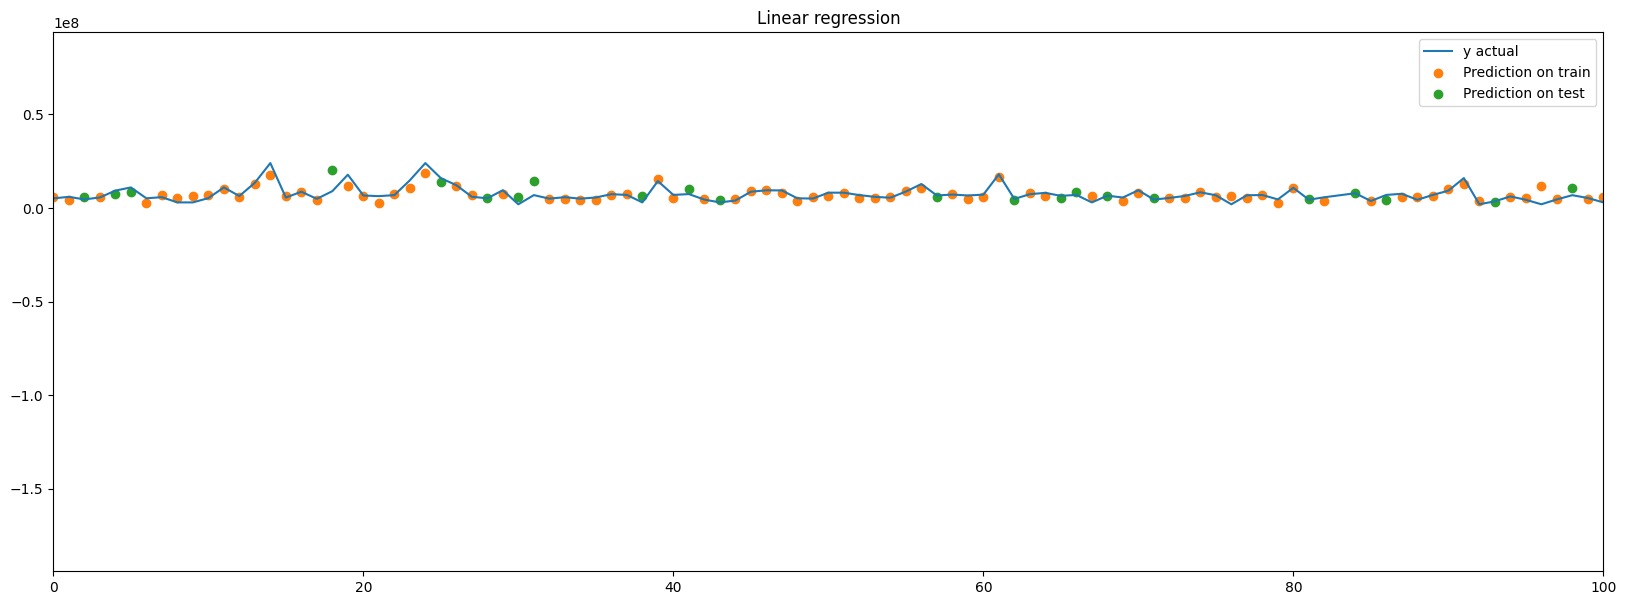

In [122]:
plt.figure(figsize = [20, 7])

y = numeric_data['price_doc']

plt.plot(y, label = 'y actual')
plt.scatter(x = y_train.index, y = y_approx_4, color = 'C1', label = 'Prediction on train')
plt.scatter(x = y_test.index, y = y_pred_4, color = 'C2', label = 'Prediction on test')
plt.title('Linear regression')
plt.legend()
plt.xlim([0, 100]) # так как показывать график на всём интервале нецелесообразно, выберем малеьнкий участок длины 100
plt.show()

In [123]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
poly_reg1 = LinearRegression()
poly_reg1.fit(X_poly_train, y_train)

LinearRegression()

In [124]:
y_approx_4 = poly_reg1.predict(X_poly_train)
y_pred_4 = poly_reg1.predict(X_poly_test)

In [125]:
mse_approx_4 = mean_squared_error(y_train, y_approx_4)
print('MSE on train: {:.2}'.format(mse_approx_4))
mape_approx_4 = mean_absolute_percentage_error(y_train, y_approx_4)
print('MAPE on train: {:.2%}'.format(mape_approx_4))
mae_approx_4 = mean_absolute_error(y_train, y_approx_4)
print('MAE on train: {:.2}'.format(mae_approx_4))
r2_approx_4 = r2_score(y_train, y_approx_1)
print('R^2 on train: {:.2%}'.format(r2_approx_4))

MSE on train: 2.8e+13
MAPE on train: 83.84%
MAE on train: 3.5e+06
R^2 on train: 53.87%


In [126]:
mse_test_4 = mean_squared_error(y_test, y_pred_4)
print('MSE on test: {:.2}'.format(mse_test_4))
mape_test_4 = mean_absolute_percentage_error(y_test, y_pred_4)
print('MAPE on test: {:.2%}'.format(mape_test_4))
mae_test_4 = mean_absolute_error(y_test, y_pred_4)
print('MAE on test: {:.2}'.format(mae_test_4))
r2_approx_4 = r2_score(y_train, y_approx_1)
print('R^2 on train: {:.2%}'.format(r2_approx_4))

MSE on test: 3.4e+13
MAPE on test: 82.54%
MAE on test: 3.5e+06
R^2 on train: 53.87%


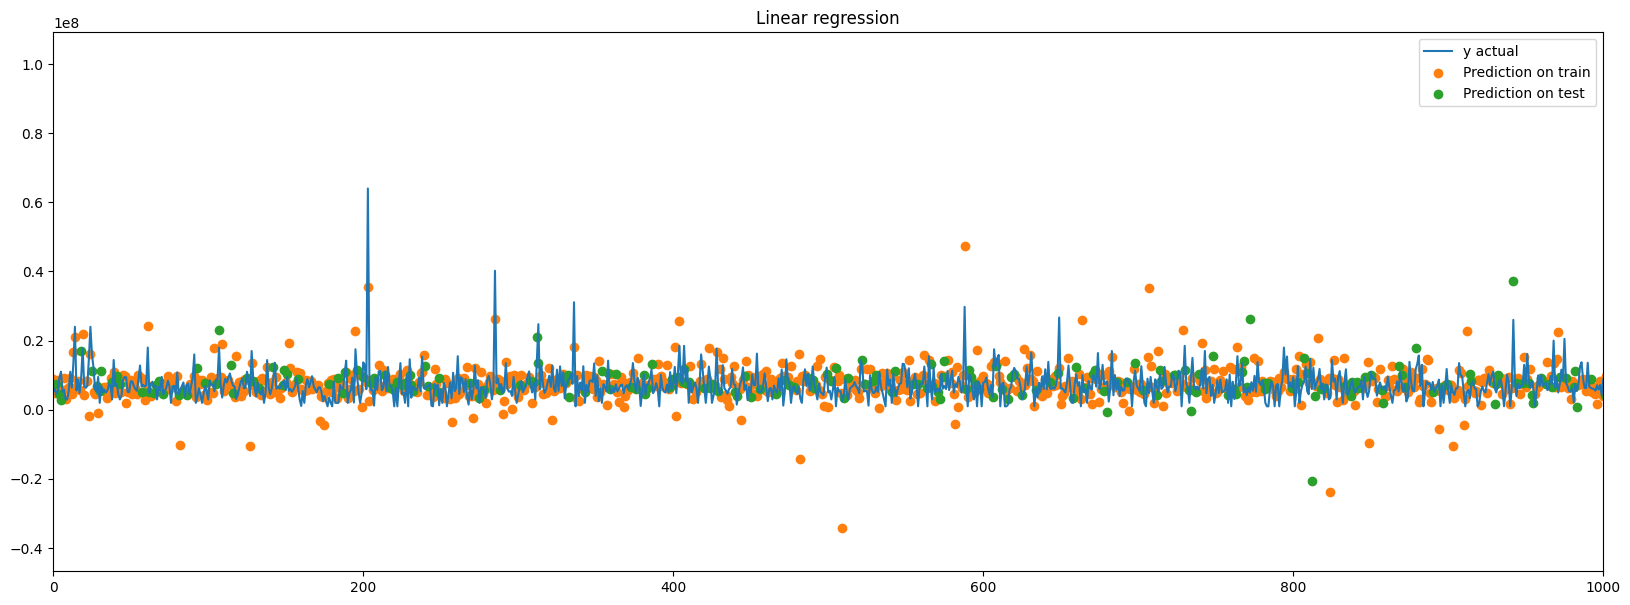

In [134]:
plt.figure(figsize = [20, 7])

y = numeric_data['price_doc']

plt.plot(y, label = 'y actual')
plt.scatter(x = y_train.index, y = y_approx_4, color = 'C1', label = 'Prediction on train')
plt.scatter(x = y_test.index, y = y_pred_4, color = 'C2', label = 'Prediction on test')
plt.title('Linear regression')
plt.legend()
plt.xlim([0, 1000]) # так как показывать график на всём интервале нецелесообразно, выберем малеьнкий участок длины 100
plt.show()

### 9. выводы

- Гребневая, Лассо и Линейные модели оказались схожими
- Несмотря на то, что средневадратические ошибки достаточно велики, на тесте и тренировке оказались схожмими, что свидетельсвует о высокой степени обучаемости
- С построением полиноминальной регресии ошибки не уменшились